# Mask R-CNN - Inspect Socket training data

Inspect and visualize data loading and pre-processing code.

In [1]:
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library

from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.sockets import socket

%matplotlib inline 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

## Configuration

In [2]:
config = socket.SocketConfig()
SOCKET_DIR = os.path.join(ROOT_DIR, "dataset")

## Dataset

In [3]:
# Load dataset
dataset = socket.SocketDataset()
dataset.load_socket(SOCKET_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 6
Class Count: 2
  0. BG                                                
  1. socket                                            


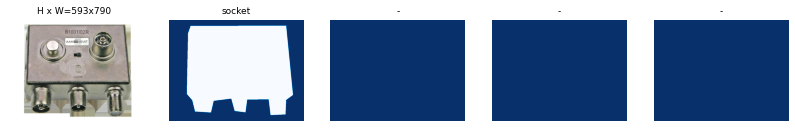

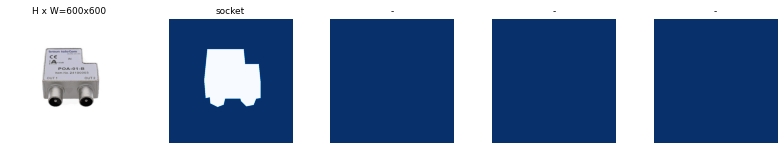

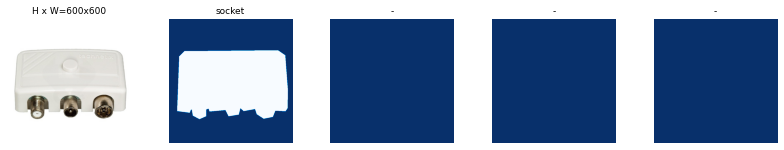

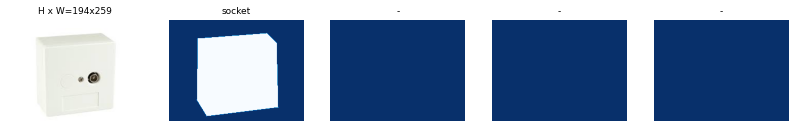

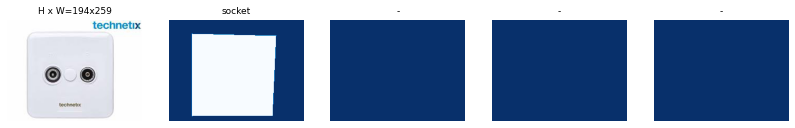

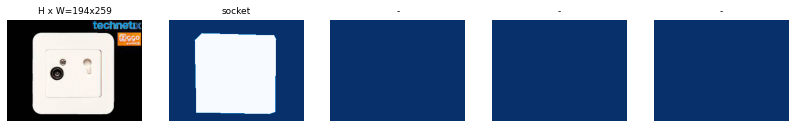

In [4]:
# Load and display random samples
# image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in dataset.image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## Add bounding boxes

image_id  0 /Users/wolfsinem/maskrcnn/dataset/train/SPLITTER-UMU.png
image                    shape: (593, 790, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (593, 790, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   38.00000  max:  726.00000  int32


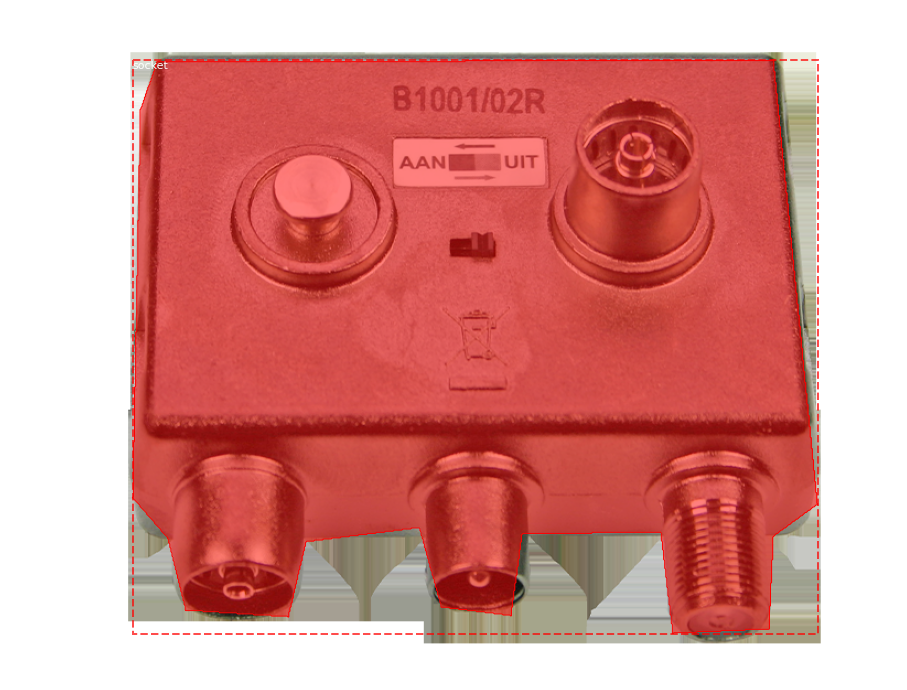

image_id  1 /Users/wolfsinem/maskrcnn/dataset/train/SPLITTER-POA.jpg
image                    shape: (600, 600, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (600, 600, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  145.00000  max:  443.00000  int32


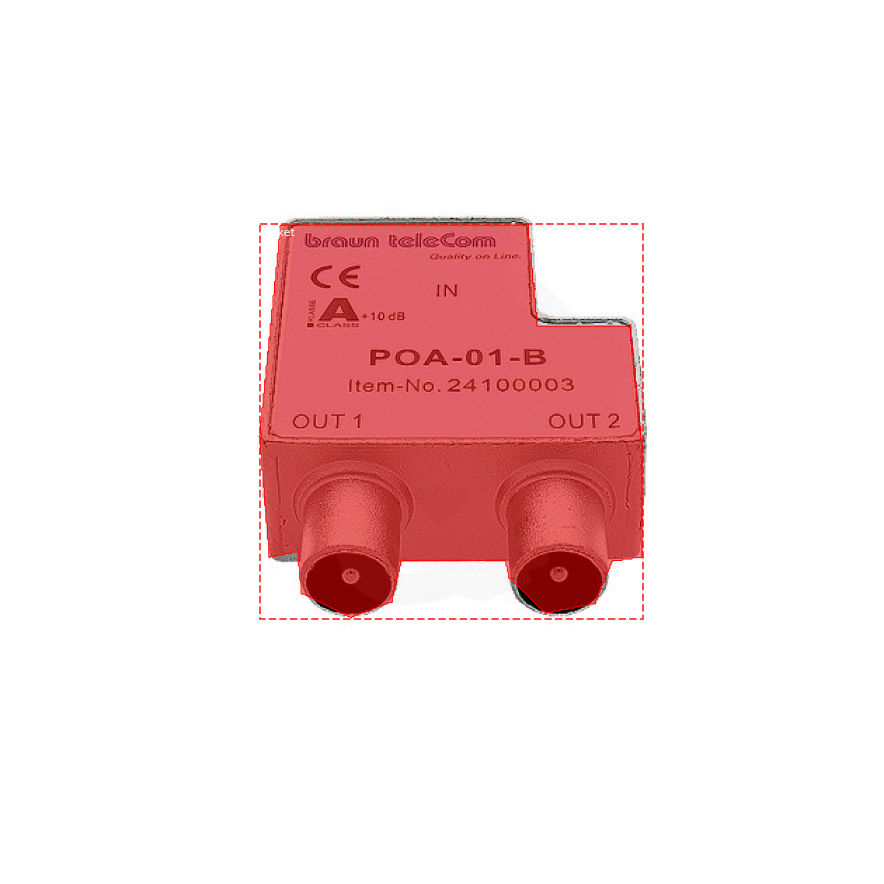

image_id  2 /Users/wolfsinem/maskrcnn/dataset/train/SPLITTER-MCP.jpg
image                    shape: (600, 600, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (600, 600, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   39.00000  max:  576.00000  int32


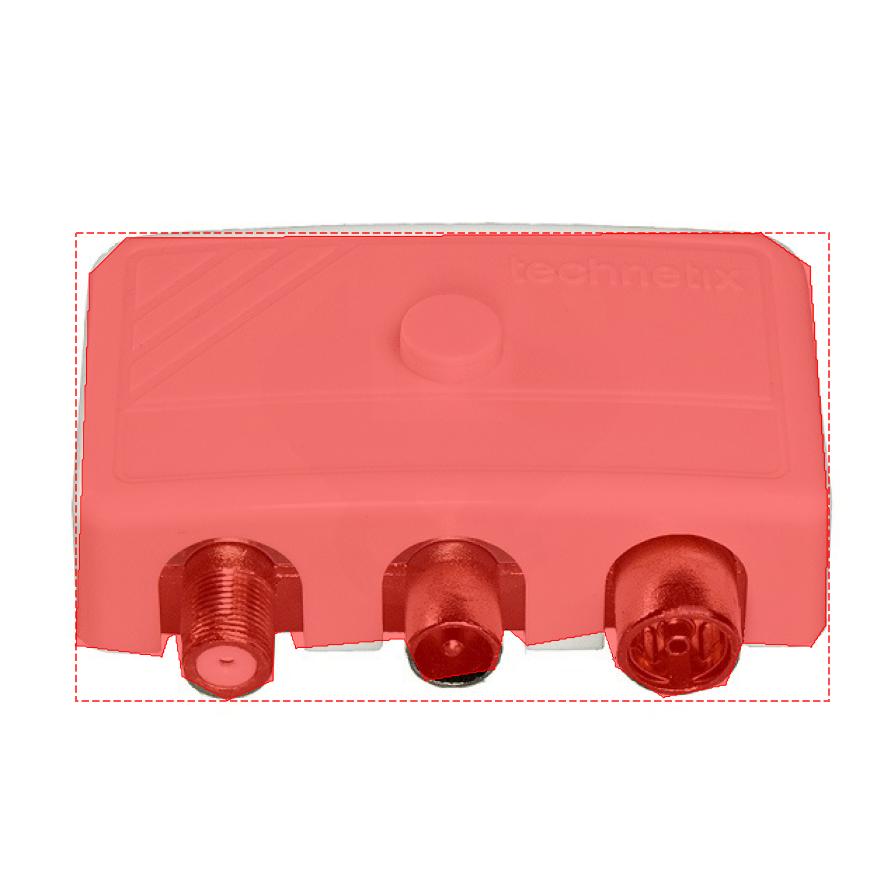

image_id  3 /Users/wolfsinem/maskrcnn/dataset/train/AOV-BTV.jpg
image                    shape: (194, 259, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (194, 259, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   25.00000  max:  210.00000  int32


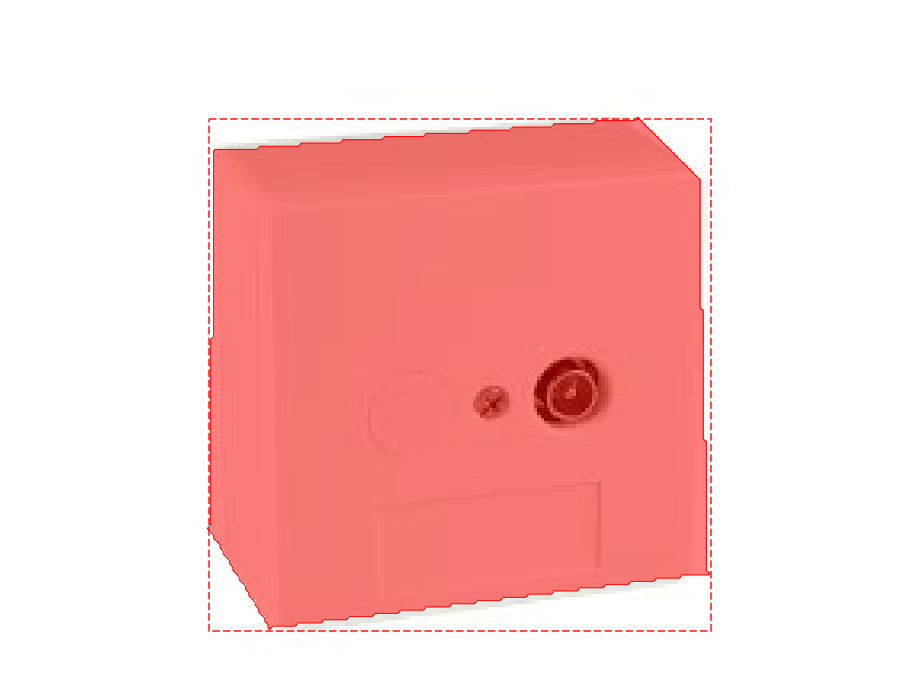

image_id  4 /Users/wolfsinem/maskrcnn/dataset/train/AOP-TRAS2000.jpg
image                    shape: (194, 259, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (194, 259, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   26.00000  max:  206.00000  int32


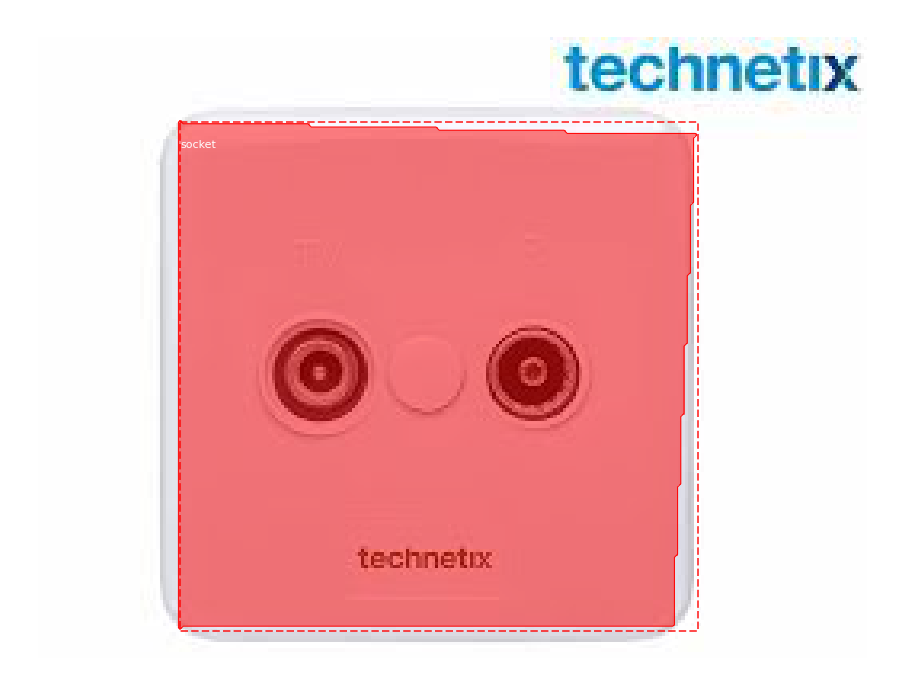

image_id  5 /Users/wolfsinem/maskrcnn/dataset/train/AOP-DIO.jpg
image                    shape: (194, 259, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (194, 259, 1)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   25.00000  max:  206.00000  int32


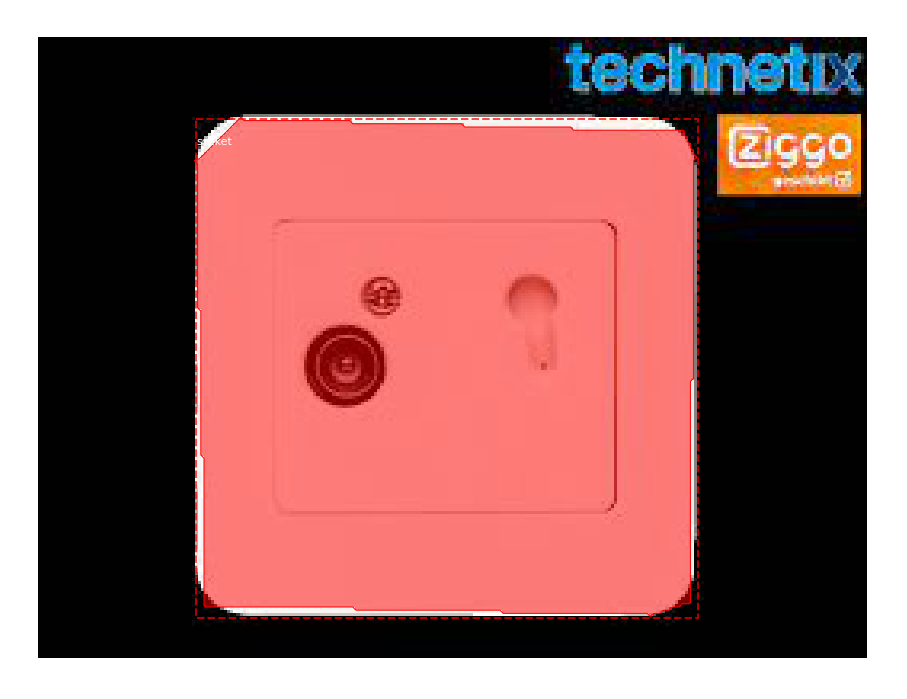

In [6]:
for image_id in dataset.image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)

    bbox = utils.extract_bboxes(mask)

    print("image_id ", image_id, dataset.image_reference(image_id))
    log("image", image)
    log("mask", mask)
    log("class_ids", class_ids)
    log("bbox", bbox)

    visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)